# CUpler : The Notebook  
Given the geometrical nature of the library developed in the present work, visualization can be an efficient approach for testing the methods implemented and getting more grasp and intuition on the different settings and the phenomenas that go with them.  
This notebook is a python-adaptation of the methods implemented in the library, along with relevant visualization utilities. The scripting language was chosen for the simple reason that it's more suitable for interactive testing and visualization.

In [33]:
#Relevant packages
import numpy as np
from matplotlib import pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import plotly.express as px
import pandas as pd

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 80 

## 

## I. Initial Study : 2D Case  
This basic special case study of 2D plane motion of spheres helps introduce the basic movement equations and visualize the trajectories for different settings.  
This special case serves also as an experimentation starting point to get an intuition about spheres relative motion to each other preparing for intersection and proximity computation.  
### I.1 Mathematical formulation  
The general expression of a moving material point in both polar and 2D-cartesian coordinates can be written as follow : 

$${\vec{OM_t} = r.\vec{e_{r}(t)}} = x.\vec{e_x} + y.\vec{e_y}$$
Unlike ${(\vec{e_x},\vec{e_y})}$, the polar base is not fixed in time, and can be expressed relatively to the cartesian base using the rotation angle $\phi_t$ : 
$${(\vec{e_{r}(t)}, \vec{OM_t}) = \phi_t}$$
Applying a, orthogonal projection on the cartesian base gives the following basic expressions : 
$${x = r_t.cos(\phi_t)}$$
$${y = r_t.sin(\phi_t)}$$

A rotation motion of a point M on the origin $0 = (0,0)$ at a given algebraic constant angular velocity $\omega$ implies that the expression of the rotation angle $\phi_t$ is as follow :  
$${\phi_t =  \phi_0 \ +\ \omega t }$$  

After simplification, the euclidean distance between two moving spheres on the plane is :  

$${distance_{1,2}(t) = r_1^{2} + r_2^{2} - 2.r_1.r_2.cos(\phi_1(t) - \phi_2(t) )}$$
$${distance_{1,2}(t) = r_1^{2} + r_2^{2} - 2.r_1.r_2.cos(\phi_1^0 - \phi_2^0 + (\omega_1 - \omega_2).t)} \ \ \ (1)$$ 



### I.2 Implementation of motion equation and inter-spheres distance  

In [35]:
def get2DTraj(sphere, t, cart = True): 
    """
        Polar case (movement on plan {Ox, Oy})
        Polar/cartesian coordinates at time t of sphere
    """
    r = sphere.get("r")
    phi0 = sphere.get("phi0")
    w = sphere.get("w")
        
    phi = phi0 + w*t #phi
    
    if(cart):
        trajCartesian = np.array([r*np.cos(phi) , r*np.sin(phi)])
        return(trajCartesian)
    else:
        print("used polar coords")
        return(phi)


In [36]:
def dist2D(sphere1, sphere2, t):
    """
        Polar case (movement on plan {Ox, Oy})
        Euclidean distance between two spheres at time t (movement on plan {Ox, Oy})
    
    """
    r1 = sphere1.get("r")
    r2 = sphere2.get("r")
 
    dist_t = r1**2+r2**2-2*r1*r2*np.cos(getTraj(sphere1, t, cart=False) -getTraj(sphere2, t, cart=False) ) 
    
    return(np.sqrt(dist_t))

We can imagine 3 basic scenarios of 2 spheres moving on the plan that will result in different relative behaviors :  
    -a) Both spheres are moving at the same speed in the same direction  
    -b) Both spheres are moving at the same speed in opposite directions  
    -c) Both spheres are moving in the same direction with different speeds  

In order to test these different scenarios, we implement a basic experimentation routine that displays both spheres trajectories along with the evolution of their mutual euclidean distance over time.  

In [82]:
def experiment2D(sphere1, sphere2):
    rmax = max(sphere1.get("r"), sphere2.get("r")) +1
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.grid()
    plt.axis([-rmax, rmax, -rmax, rmax])

    traj1Cart = get2DTraj(sphere1, 0, cart=True)
    traj2Cart = get2DTraj(sphere2, 0, cart=True)


    ax.plot([traj1Cart[0]],[traj1Cart[1]],'ro',color='y', markersize=15)
    ax.plot([traj2Cart[0]],[traj2Cart[1]],'ro',color='y', markersize=15)

    distance = []
    timeHistory = []

    tMax = (2*np.pi/min(np.abs(sphere1.get("w")),np.abs(sphere2.get("w"))))
    step = 0.5
    length = int(tMax / step)
    for t in range(0,length,1):
        traj1Cart = get2DTraj(sphere1, t*step, cart=True)
        ax.plot([traj1Cart[0]],[traj1Cart[1]], 'o',color='g', markersize=10 - 8*t*step/(tMax))
        
        traj2Cart = get2DTraj(sphere2, t*step, cart=True)
        ax.plot([traj2Cart[0]],[traj2Cart[1]], 'o',color='r', markersize=10 - 8*t*step/(tMax))
        
        
        distanceTemp = np.linalg.norm(traj1Cart-traj2Cart)
        distance.append(distanceTemp)
        timeHistory.append(t*step)
    
    return(timeHistory, distance)

    

### a) Same speed, same direction  

In [83]:
sphere1 = {"r":9, "w":np.pi/50, "phi0":0}
sphere2 = {"r":4, "w":np.pi/50, "phi0":np.pi/2}

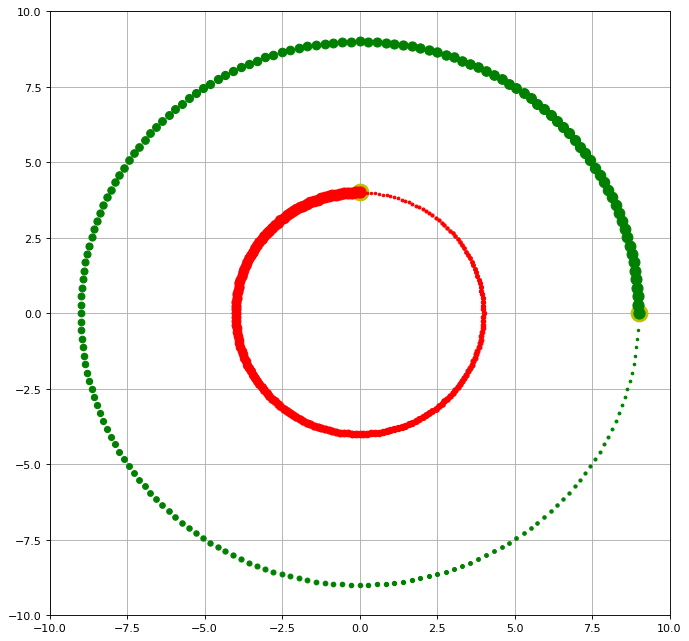

In [84]:
timeHist1, distance1 = experiment2D(sphere1, sphere2)

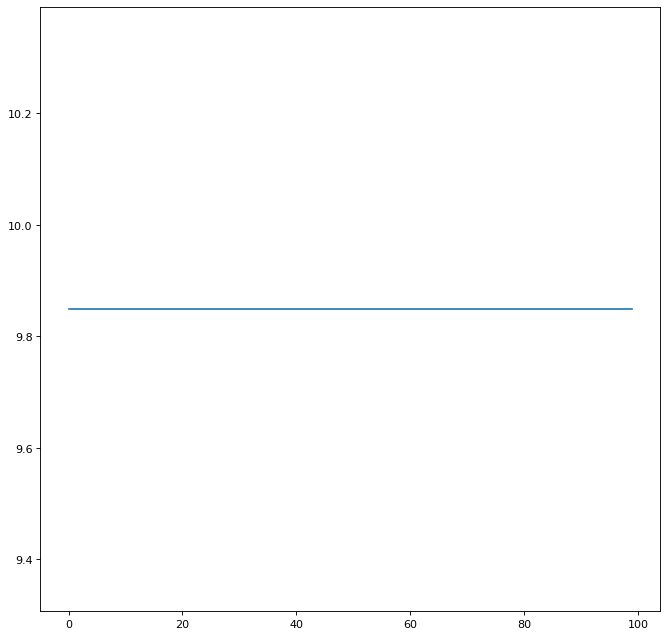

In [85]:
plt.plot(timeHist1, distance1)

### b) Same speed, opposite directions

In [86]:
sphere1 = {"r":7, "w":-np.pi/50, "phi0":0}
sphere2 = {"r":4, "w":np.pi/50, "phi0":np.pi}

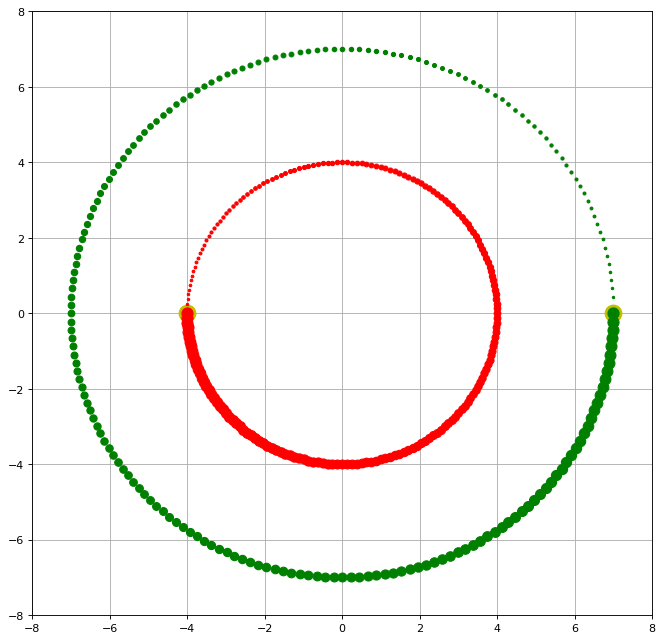

In [87]:
timeHist2, distance2 = experiment2D(sphere1, sphere2)

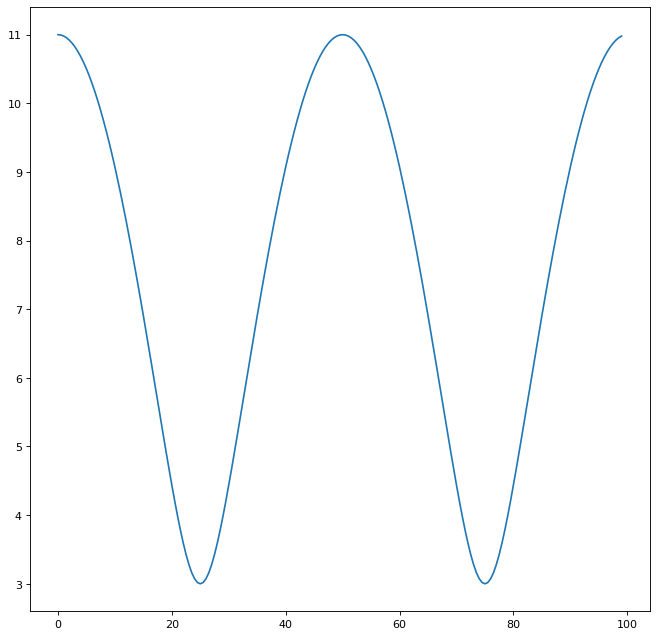

In [88]:
plt.plot(timeHist2, distance2)

### c) Same direction, different speeds  

In [89]:
sphere1 = {"r":7, "w":np.pi/20, "phi0":0}
sphere2 = {"r":4, "w":np.pi/50, "phi0":np.pi/2}

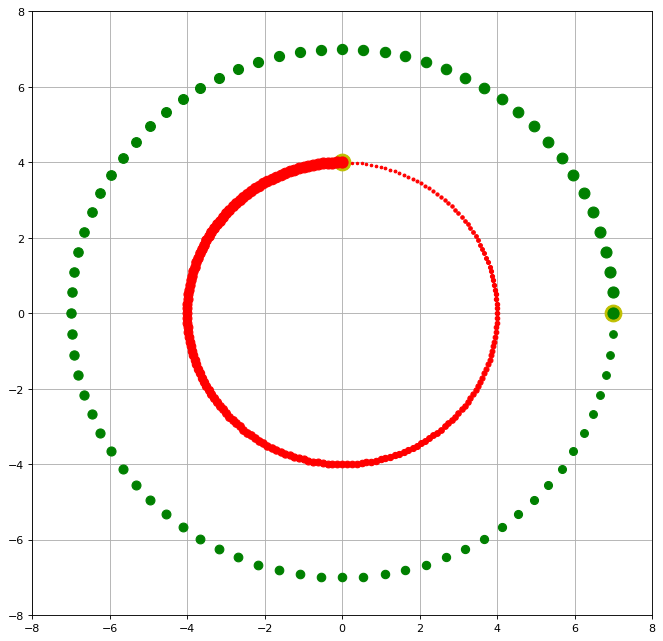

In [90]:
timeHist3, distance3 = experiment2D(sphere1, sphere2)

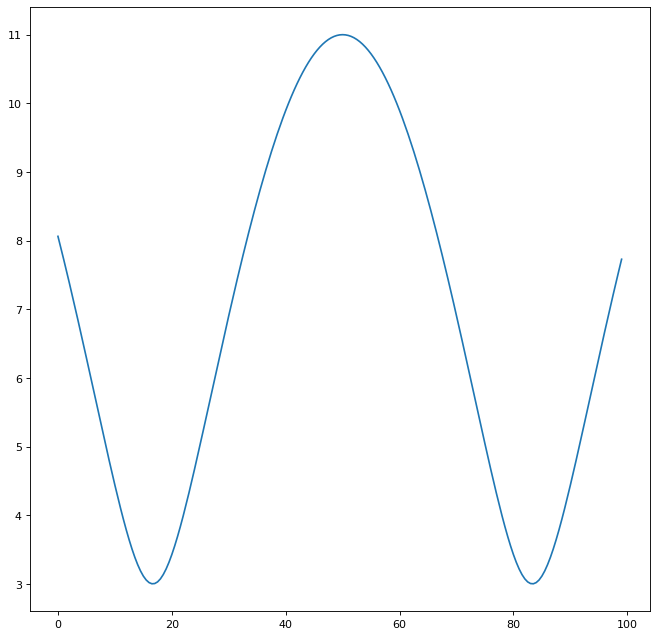

In [91]:
plt.plot(timeHist3, distance3)

The visual results perfectly reflect the equation (2) :  
- The distance is constante when ${\omega_1 = \omega_2}$ and is equal to ${ r_1^{2} + r_2^{2} - 2.r_1.r_2.cos(\phi_1^0 - \phi_2^0)}$  
- The distance is sinusoidal with a frequency  = ${\omega_1 - \omega_2}$ when ${\omega_1 \neq \omega_2}$  

### I.3 Minimal distance between two moving spheres  
#### I.3.1 Mathematical Formulation  
Equation (2) predicts the minimal distance between two spheres, which fall into 2 categories based on ${\omega_1}$ and ${\omega_2}$  :  
- ${\omega_1 = \omega_2 }$ :  ${minDistance = \sqrt{r_1^{2} + r_2^{2} - 2.r_1.r_2.cos(\phi_1^0 - \phi_2^0)}}$
- ${\omega_1 \neq \omega_2 }$ :  ${minDistance = \sqrt{r_1^{2} + r_2^{2} }}$  

The proximity between the two spheres is constant for the fist case, and thus it happens first at t = 0. For the second case, the proximity happens at time $t_{proximity}$ which verifies the following equation :   
$${\phi_1(t_{proximity})=\phi_2(t_{proximity})}$$  
Which can be simplified :  
$${t = \frac{\phi_2^0 - \phi_1^0}{\omega_1 - \omega_2} \ [2\pi]}$$


#### I.3.2 Implementation  


In [93]:
def getTProx(sphere1, sphere2):
    """
        Returns the FIRST time two spheres moving on the plan (Ox, Oy) get the closest
    """

    phi01 = sphere1.get("phi0")
    phi02 = sphere2.get("phi0")
    w1 = sphere1.get("w")
    w2 = sphere2.get("w")

    
    if(w1==w2):
        return(0)

    beta_0 = (phi02 - phi01)/(w1-w2)
    
    k = 0
    if beta_0>=0:
        k = 0
    elif phi02 - phi01>0:
        k = -1
    else:
        k = 1
    
    t_prox = (phi02 - phi01 + 2*k*np.pi)/(w1-w2)
    
    return(t_prox)

#### I.3.3 Testing  

In [96]:
#same speed, same direction
sphere1 = {"r":9, "w":np.pi/50, "phi0":0}
sphere2 = {"r":4, "w":np.pi/50, "phi0":np.pi/2}
print("case a), tProximity = ", getTProx(sphere2, sphere1))

#same speed, opposite directions
sphere1 = {"r":7, "w":-np.pi/50, "phi0":0}
sphere2 = {"r":4, "w":np.pi/50, "phi0":np.pi}
print("case b), tProximity = ", getTProx(sphere2, sphere1))


#same direction, different speeds
sphere1 = {"r":7, "w":np.pi/20, "phi0":0}
sphere2 = {"r":4, "w":np.pi/50, "phi0":np.pi/2}
print("case c), tProximity = ", getTProx(sphere2, sphere1))


case a), tProximity =  0
case b), tProximity =  24.999999999999996
case c), tProximity =  16.666666666666668


The results match exactly the distance=f(time) figures plotted previously.

# II. Generalized 3D movement     
## II.1 Mathematical formulation  
On a general 3D motion, a moving point can be spotted using 3 cartesian coordinates $(x, y, z)$ or using 3 spherical coordinates $(r, \theta, \phi)$.  
Moving from spherical to cartesian coordinates can be done through orthogonal projections on the 3 axis :  
Given a point M at time t :  
$${\vec{OM_t} = r.\vec{e_{r}(t)}} = x.\vec{e_x} + y.\vec{e_y} + z.\vec{e_z}$$

$$x = r.sin(\theta).cos(\phi)$$ 
$$y = r.sin(\theta).sin(\phi)$$ 
$$x = r.cos(\theta)$$ 

The rotation of a point arround the origin $O(0,0,0)$ follows the trajectory of a **Great Circle** of the Sphere with center $O(0,0,0)$ and radius r.  
## II.2 Implementation of kinematic laws  
The planets are modeled as a Sphere with given :  
- r : radius  
- w : absolute angular velocity  
- uv : unit vector translating the movement direction at t = 0  
- $\theta_0$ and $ \phi_0$ : initial sphere coordinates at t = 0



In [99]:
class Sphere:
    
    #constructor    
    def __init__(self, r, w, theta0, phi0, gamma, uv = None):
        self.r = r
        self.w = w
        self.theta0 = theta0
        self.phi0 = phi0
        
        if(uv is not None):
            #user explicitely provided direction vector
            self.uv =uv
        else:
            #Unit direction vector computed based on relative declination angle
            self.uv = np.round(np.array([-np.cos(phi0)*np.cos(theta0)*np.sin(gamma) - np.sin(phi0)*np.cos(gamma),

                           -np.sin(phi0)*np.cos(theta0)*np.sin(gamma) + np.cos(phi0)*np.cos(gamma),

                            np.sin(theta0)*np.sin(gamma)
                           ]),15)
        
        #Computed later
        self.alpha = None
        self.beta = None
        self.n = None
        self.phi0Relative = None
    
    #Display info 
    def __str__(self):
        result = "Radius = %f , Phi0 = %f, Theta0 = %f \nw = %f, uv = [%f, %f, %f]\n"%(self.r, self.phi0, self.theta0, self.w, self.uv[0],self.uv[1],self.uv[2])
        if(self.n is not None):
            result+="normal = [%f, %f, %f]\n"%(self.n[0], self.n[1], self.n[2])
        if(self.alpha is not None):
            result+="alpha = %f , beta = %f\n"%(self.alpha, self.beta)
        if(self.phi0Relative is not None):
            result+="Relative phi0 = %f"%(self.phi0Relative)
        return(result)
        
    #Computing unit normal vector to movement plan
    def computeNormal(self):
        theta0 = self.theta0
        phi0 = self.phi0
        uv = self.uv
        
        self.n = np.round(np.array( [-uv[1]*np.cos(theta0) + uv[2]*np.sin(theta0)*np.sin(phi0),
                 -uv[2]*np.cos(phi0)*np.sin(theta0)+uv[0]*np.cos(theta0),
                 np.sin(theta0)*(-uv[0]*np.sin(phi0)+uv[1]*np.cos(phi0))]),5)
        
    #Computing vertical/horizontal declination angles (alpha, beta) of the directed movement plan 
    def computeRefAngles(self):
        #Computing normal
        self.computeNormal()
        phi0 = self.phi0
        
        n = self.n
        
        alpha = np.arccos(n[2])
        
        if(np.abs(n[2])==1):
            if(n[2]>0):
                beta = phi0 
            else:
                beta = np.pi + phi0
        else:            
            beta = np.arccos(-n[1]/np.sqrt(n[0]**2+n[1]**2))
            if(n[0]<0):
                beta = 2*np.pi - beta

        self.alpha = alpha
        self.beta = beta
        
        
    #Computing relative initial angle in the movement plan
    def computePhi0Relative(self):
        phi0 = self.phi0
        theta0 = self.theta0
        alpha = self.alpha
        beta = self.beta
        
        self.phi0Relative = np.arccos(np.sin(theta0)*np.cos(phi0 - (((beta-np.pi)<0)*beta +(np.round(beta-np.pi,5)>=0)*(beta-np.pi)))) + (np.round(beta-np.pi,5)>=0 and np.round(np.sin(theta0),8)!=0 )*np.pi

    #Computing theoretical trajectory of the sphere from t = 0 to t = tMax
    def getTrajectory(self, tMax, step = 1):


        length = (tMax+step)//step 

        t = np.arange(0,length+1,1)/length
        t = tMax*t
        
        r = self.r
        theta0 = self.theta0
        phi0 = self.phi0
        w = self.w
        uv = self.uv
        alpha = self.alpha
        beta = self.beta
        
        #basic check
        OM_0 = np.round(np.array([np.sin(theta0)*np.cos(phi0), np.sin(theta0)*np.sin(phi0), np.cos(theta0)]),10)

        dotProd = np.round(np.dot(uv, OM_0),8)

        print("OM_0 : ", r*OM_0)

        print("dot prod uv OM-0 = ", dotProd)

        if(dotProd!=0):
            print("Initial settings are ambiguous")
            return(t, pd.DataFrame({'x': np.empty_like(t),'y' :np.empty_like(t) ,'z' : np.empty_like(t) }))


        phi0Prime = np.arccos(np.sin(theta0)*np.cos(phi0 - (((beta-np.pi)<0)*beta +(np.round(beta-np.pi,5)>=0)*(beta-np.pi)))) + (np.round(beta-np.pi,5)>=0 and np.round(np.sin(theta0),8)!=0 )*np.pi

        print("phi0Prime = ",phi0Prime/np.pi, "pi")


        x = np.round(r*(np.cos(beta)*np.cos(phi0Prime+w*t) - np.sin(beta)*np.cos(alpha)*np.sin(phi0Prime+w*t)),10)
        y = np.round(r*(np.sin(beta)*np.cos(phi0Prime+w*t) + np.cos(beta)*np.cos(alpha)*np.sin(phi0Prime+w*t)),10)
        z = np.round(r*np.sin(alpha)*np.sin(phi0Prime+w*t),12)

        df = pd.DataFrame({'x': x,'y' :  y,'z' : z })

        return(t, df)
        

## II.3 Testing/Visualization of 3D motion
### II.3.1 Particular case : (Ox, Oy) plannar movement

In [104]:
sp1 = Sphere(r=5, w = np.pi/100, phi0=0, theta0=np.pi/2, gamma=0)
sp1.computeNormal()
sp1.computeRefAngles()
sp1.computePhi0Relative()

In [105]:
print(sp1)

Radius = 5.000000 , Phi0 = 0.000000, Theta0 = 1.570796 
w = 0.031416, uv = [-0.000000, 1.000000, 0.000000]
normal = [-0.000000, -0.000000, 1.000000]
alpha = 0.000000 , beta = 0.000000
Relative phi0 = 0.000000


In [106]:
tHist1, data1 = sp1.getTrajectory(tMax=180, step=1)

OM_0 :  [5. 0. 0.]
dot prod uv OM-0 =  0.0
phi0Prime =  0.0 pi


In [107]:
px.scatter_3d(data1, x='x', y='y', z='z', color='z')

### II.3.2 General Case  

In [117]:
sp2 = Sphere(r=10, w = np.pi/100, phi0=np.pi/4, theta0=np.pi/2, gamma=np.pi/4)
sp2.computeNormal()
sp2.computeRefAngles()
sp2.computePhi0Relative()

In [118]:
print(sp2)

Radius = 10.000000 , Phi0 = 0.785398, Theta0 = 1.570796 
w = 0.031416, uv = [-0.500000, 0.500000, 0.707107]
normal = [0.500000, -0.500000, 0.707110]
alpha = 0.785394 , beta = 0.785398
Relative phi0 = 0.000000


In [119]:
tHist2, data2 = sp2.getTrajectory(tMax=180, step=1)

OM_0 :  [7.07106781 7.07106781 0.        ]
dot prod uv OM-0 =  0.0
phi0Prime =  0.0 pi


In [120]:
px.scatter_3d(data2, x='x', y='y', z='z', color='z')

By Ouadie EL FAROUKI. 2021